<h2 style="font-weight: bold">Meets Bags of Popcorn</h2>

<h4>This is my first published notebook on Kaggle About NLP, So I decided ofc to take a look at the Bag of Words Meets Bags of Popcorn Compeition 😄😄<br><br>I will be doing a EDA of review texts, some Visualization and Pre-Processing. and finally modelling <br></h4>

* <h5 style="font-weight: 700">Your feedback is very welcome</h5>
* <h5 style="font-weight: 700">If you find this notebook useful, please don't forget to upvote it!</h5>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv('../input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip', delimiter = "\t", encoding = 'utf-8')
test = pd.read_csv('../input/word2vec-nlp-tutorial/testData.tsv.zip', delimiter = "\t", encoding = 'utf-8')

In [3]:
sub=pd.read_csv('../input/word2vec-nlp-tutorial/sampleSubmission.csv')

In [4]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


#  **Exploratory Data Analysis**

In [5]:
# Getting to know data
print(train.shape)
print(test.shape)

(25000, 3)
(25000, 2)


In [6]:
train['length']=train['review'].apply(len)
train['length'].describe()

count    25000.000000
mean      1327.710560
std       1005.239246
min         52.000000
25%        703.000000
50%        981.000000
75%       1617.000000
max      13708.000000
Name: length, dtype: float64

In [7]:
#Sample review
print(train['review'][0])

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally star

<AxesSubplot:xlabel='review', ylabel='Density'>

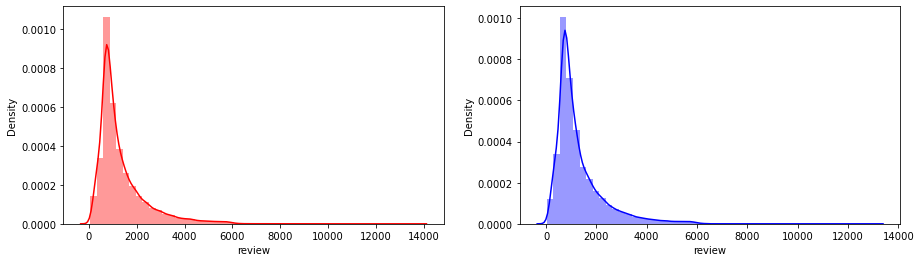

In [8]:
train_len=train['review'].apply(len)
test_len=test['review'].apply(len)

import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(15,4))
fig.add_subplot(1,2,1)
sns.distplot((train_len),color='red')

fig.add_subplot(1,2,2)
sns.distplot((test_len),color='blue')

<AxesSubplot:xlabel='word_n', ylabel='Density'>

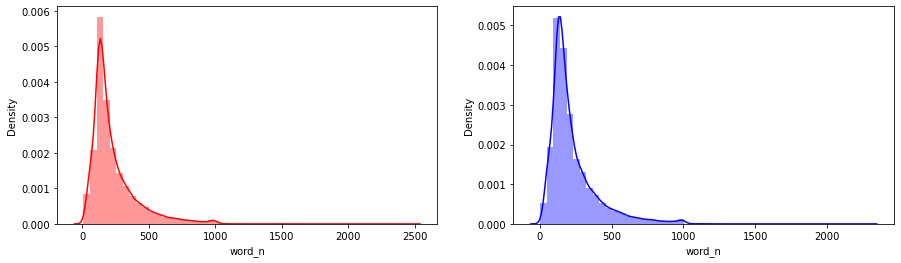

In [9]:
train['word_n'] = train['review'].apply(lambda x : len(x.split(' ')))
test['word_n'] = test['review'].apply(lambda x : len(x.split(' ')))

fig=plt.figure(figsize=(15,4))
fig.add_subplot(1,2,1)
sns.distplot(train['word_n'],color='red')

fig.add_subplot(1,2,2)
sns.distplot(test['word_n'],color='blue')

In [10]:
train['word_n'].describe()

count    25000.000000
mean       233.786240
std        173.745845
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: word_n, dtype: float64

* **Train and test set have a similar distribution of words in one review**
* **The mean words count is 233 and std is 173 words**

(-0.5, 799.5, 599.5, -0.5)

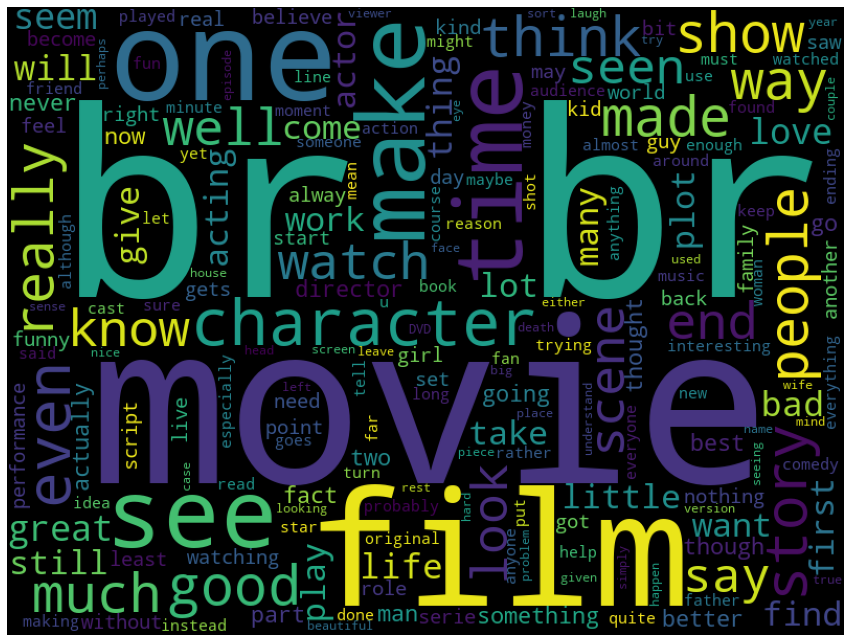

In [11]:
cloud=WordCloud(width=800, height=600).generate(" ".join(train['review'])) # join function can help merge all words into one string. " " means space can be a sep between words.
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')

* **HTML tag like br should be removed**
* **words like movie or film are present in every review**

<AxesSubplot:xlabel='sentiment', ylabel='word_n'>

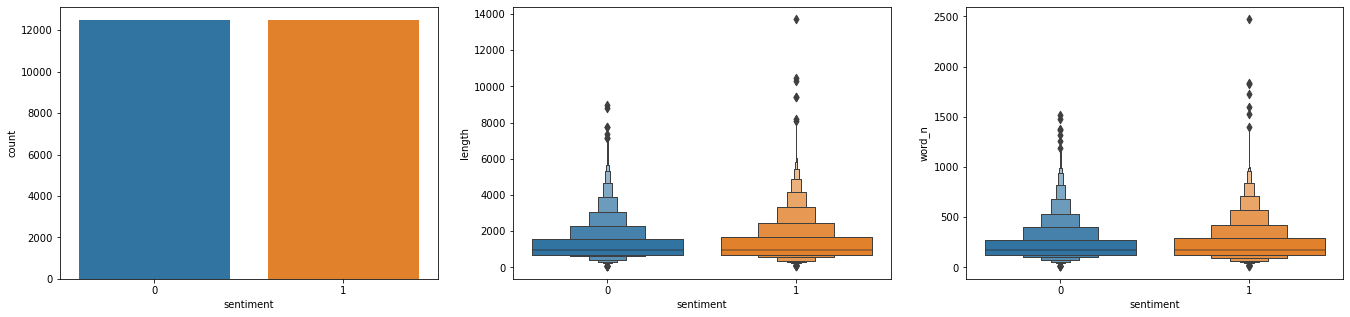

In [12]:
fig, axe = plt.subplots(1,3, figsize=(23,5))
sns.countplot(train['sentiment'], ax=axe[0])
sns.boxenplot(x=train['sentiment'], y=train['length'], data=train, ax=axe[1])
sns.boxenplot(x=train['sentiment'], y=train['word_n'], data=train, ax=axe[2])

* **The distribution of sentiment is almost equal**
* **Lengh and number of words is similar across review but positive one tends to have more words**

# **Text Preprocessing**

In [13]:
# English stopwords

stopwords=stopwords.words("english")
wordnet_lemmatizer = WordNetLemmatizer()

In [14]:
def cleaning(raw_text):
    # Removing HTML Tags
    html_removed_text=bs(raw_text).get_text()
    
    # Remove any non character
    character_only_text=re.sub("[^a-zA-Z]"," ",html_removed_text)
    
    # Lowercase and split
    lower_text=character_only_text.lower().split()
    
    # Get STOPWORDS and remove
    stop_remove_text=[i for i in lower_text if not i in stopwords]
    
    #Lemmatization
    lemma_removed_text=[wordnet_lemmatizer.lemmatize(word,'v') for word in stop_remove_text]
    
    
    return " ".join(lemma_removed_text)

In [15]:
cleaning(train['review'][0])

'stuff go moment mj start listen music watch odd documentary watch wiz watch moonwalker maybe want get certain insight guy think really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember go see cinema originally release subtle message mj feel towards press also obvious message drug bad kay visually impressive course michael jackson unless remotely like mj anyway go hate find bore may call mj egotist consent make movie mj fan would say make fan true really nice actual feature film bite finally start minutes exclude smooth criminal sequence joe pesci convince psychopathic powerful drug lord want mj dead bad beyond mj overhear plan nah joe pesci character rant want people know supply drug etc dunno maybe hat mj music lot cool things like mj turn car robot whole speed demon sequence also director must patience saint come film kiddy bad sequence usually directors hate work one kid let alone whole bunch perform complex dance scene botto

In [16]:
train['cleaned_review']=train['review'].apply(cleaning)

In [17]:
train.head()

,id,sentiment,review,length,word_n,cleaned_review
0,5814_8,1,With all this stuff going down at the moment w...,2302,433,stuff go moment mj start listen music watch od...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,158,classic war worlds timothy hines entertain fil...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449,378,film start manager nicholas bell give welcome ...
3,3630_4,0,It must be assumed that those who praised this...,2245,379,must assume praise film greatest film opera ev...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231,367,superbly trashy wondrously unpretentious explo...


In [18]:
test['review']=test['review'].apply(cleaning)

# **Modeling**

In [19]:
# Splitting the data

X=train['cleaned_review'] #Predictors
y=train['sentiment'] #Target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
def create_vector(vectorizer,data):
    '''Pass vectorizer and data'''
    train_vector=vectorizer.transform(data.tolist())
    return train_vector.toarray()

In [22]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 20000)
vectorizer.fit(X_train.tolist())

CountVectorizer(max_features=20000)

In [23]:
X_train_vector=create_vector(vectorizer,X_train)
X_test_vector=create_vector(vectorizer,X_test)

In [24]:
# RandomForestClassifier

model_RMC=RandomForestClassifier(n_estimators=110)
model_RMC.fit(X_train_vector,y_train)


y_pred=model_RMC.predict(X_test_vector)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4105
           1       0.86      0.85      0.85      4145

    accuracy                           0.85      8250
   macro avg       0.85      0.85      0.85      8250
weighted avg       0.85      0.85      0.85      8250



In [26]:
# Making a submission

test_feature_vector=create_vector(vectorizer,test['review'])
test_predictions=model_RMC.predict(test_feature_vector)

test['sentiment']=test_predictions
test[['id','sentiment']].to_csv("./output/Submission.csv",index=False)